In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

So far now we have discussed convolution neural network which is an advanced type of neural network and is mostly being used in computer vision applications. Due to its kernel operation which iteratively traverses over the given image therefore it is possible to extract the useful features from the image easily. 

So in this section, our task is to build a convolution-based neural network to classify the digit represented in a given image. The MNIST digit dataset we are using for this task holds nearly 30000 records of pixels for the digits starting from 0 to 9. Using this dataset and the CNN network we are going to classify the given set of pixels into respective digits. 

The following steps are to be taken in order to build this CNN based classifier.

Step 1: Reading the image dataset

The pixel values which are ranging from 0 to 255 are stored with respect to different 785-pixel positions. These values and labels associated with each example are stored in a CSV file  So below we will import both the training and testing dataset stored in a CSV file. 

In [2]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

df_train = np.concatenate((x_train[:20000], y_train[:20000]), axis=1)
df_test = np.concatenate((x_test[:10000], y_test[:10000]), axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
df_train.shape, df_test.shape

((20000, 785), (10000, 785))

So the training file consists of 20000 records and the test data contains 10000 records. Now let’s have an initial brief of the data. 

In [4]:
df_train

array([[0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 2]], dtype=uint8)

In [5]:
df_train=pd.DataFrame(df_train)

In [6]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [7]:
df_test=pd.DataFrame(df_test)

In [8]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


As we can see their total of 784-pixel positions and at the 0th position the labels are stored for each respective record. 

**Step 2: Defining features and labels**

Let’s split the features of the above dataframe, that is from the dataset we have to consider the pixel positions from 1 to 784 as input features (independent feature) and the first 0th column as output feature (dependent feature).  

Using the mnist_train_small.csv file we will obtain the training set and by mnist_test.csv file will obtain the testing set. 

In [9]:
# Defining input-output features for training
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:, 0].values
# Defining input-output features for test
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0]

Let's finally check the shape of both datasets. 



In [10]:
# Shape of training and test patterns
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20000, 784), (20000,), (10000, 784), (10000,))

**Step 3: Data Preprocessing**

The pixel values are ranging from 0 to 255 but these pixel values will lead the neural network to give higher weights to the large values. So to avoid this we need to scale down all pixel values between the range 0 to 1. Before scaling down we will make sure the data is represented in 32 bits. 

# Scaling the pixel values to be between 0 and 1

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

Now after scaling down the values we will visualize some samples of the digits as follows. To visualize these pixels we need to convert the shape of the data so that the matplotlib can handle it. 

In [12]:
# Reshaping the dataset, so that we can display the individual images, and model them
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28))
X_test = tf.reshape(X_test, (-1, 28, 28))
print(X_train.shape, X_test.shape)

2023-02-04 10:29:50.403056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 10:29:50.497082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 10:29:50.497924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 10:29:50.501044: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

(20000, 28, 28) (10000, 28, 28)


Let’s check the above-converted dataset by visualizing a few image

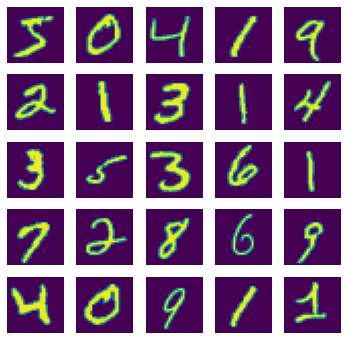

In [13]:
# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")

Above in grid structure, we can see how the digits look, the digits are basically represented in the grayscale format.

While building the CNN model we need to specify the colour channel of the image which is grey, so below we will add the color channel to all samples.

In [14]:
# Reshaping the training and test features
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, X_test.shape)

(20000, 28, 28, 1) (10000, 28, 28, 1)


The above shape tells us that the training samples consist of 20000 images with each image having dimensions of 28 x 28 x 1. 

**Step 4: Defining the CNN model**

Now to build the CNN network we need to import the dependencies that are required to build the model. 

In [15]:
# Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

Now below we will define the sequential CNN model. The network will consist of 4 layers, one input and output layer each and two hidden layers. Neurons of the layers are activated according to the Relu activation function except for the last classifier layers whose neurons are activated according to the softmax function. 

In [16]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

summarising said model

In [17]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

From the above, we can confirm the model's layers and parameters defined. 

**Step 5: Training the CNN model**

Before training the network we have to compile the model with the appropriate loss function and optimizer. For this task, we are using sparse_categorical_crossentropy as the loss function and adam as the optimizer function. 

In [18]:
# Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

Now we are good at training the network, we will train this network for 200 epochs with a batch size of 512. 

In [19]:
# Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 250, verbose = 1)

2023-02-04 10:29:54.581805: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250


2023-02-04 10:29:55.952026: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


40/40 [==============================] - 8s 9ms/step - loss: 0.2010 - accuracy: 0.9758
Epoch 2/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/250
40/40 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/250
40/40 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - ac

At the 200th epoch, the model has recorded outstanding accuracy which is around 99.40% on the training dataset. Let’s plot the loss and accuracy observed throughout this training period so that we can know the model has trained.  

Text(0.5, 1.0, 'Accuracy evolution')

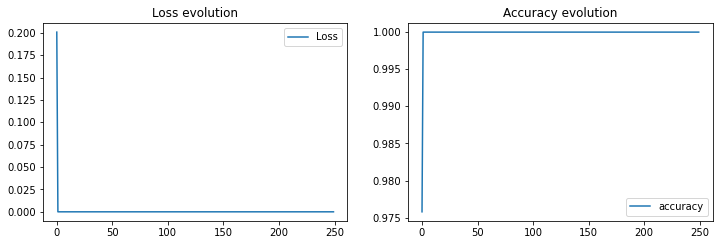

In [20]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss evolution')
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.title('Accuracy evolution')

Step 6: Making Predictions

Now finally we will obtain the prediction for the above-trained model. So we are going to provide the below digit which is 7 so let’s obtain the prediction on that

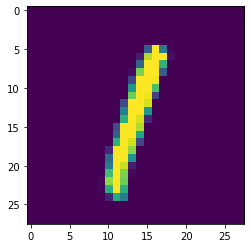

In [21]:
actual = tf.reshape(X_test[5], (28, 28))
plt.imshow(actual)

Now let’s check what the trained CNN model predicts for this same image data.



In [22]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
test_img = tf.reshape(X_test[5], (-1, 28, 28, 1))
prediction = cnn_model.predict(test_img)
prediction[0]

array([1.0000000e+00, 3.6423967e-35, 1.4273004e-31, 7.0229007e-31,
       9.5314031e-32, 5.8343476e-32, 7.5187131e-30, 5.7463678e-33,
       3.7351718e-32, 7.7445762e-31], dtype=float32)

In [23]:
np.argmax(prediction[0])

0